<a href="https://colab.research.google.com/github/joke3547/Github-Colab-AIA-Car_Accident/blob/main/AIA_car_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Tensorflow 相關套件
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# 上傳資料
from google.colab import drive
# 授權連接到 Google Drive
drive.mount('/content/drive')
# 載入資料
rawdata_train_path = '/content/drive/MyDrive/AIA_Exercise/aia-xt131-ml-midterm/Train.csv'  # 資料在 Google Drive 的路徑
rawdata_test_path = '/content/drive/MyDrive/AIA_Exercise/aia-xt131-ml-midterm/Test.csv'
rawdata_train = pd.read_csv(rawdata_train_path)  # 假設使用 pandas 讀取 CSV 檔案
rawdata_test = pd.read_csv(rawdata_test_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rawdata_train

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,84KmV9FHCC,Source1,2,2020-10-16 17:41:00,2020-10-16 19:15:00,33.944331,-84.509958,33.937641,-84.499248,0.768,...,False,False,False,False,False,False,Day,Day,Day,Day
1,f4T1S69MFc,Source1,3,2020-06-11 16:15:33,2020-06-11 16:45:33,42.428670,-87.903940,42.428670,-87.903940,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
2,rfSuABMMuo,Source1,1,2020-04-30 12:00:00,2020-04-30 12:30:00,40.897740,-73.797030,40.897740,-73.797030,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3,ybUhXk2foJ,Source1,4,2020-05-11 21:44:03,2020-05-11 22:12:30,35.656830,-118.440450,35.656480,-118.444170,0.210,...,False,False,False,False,False,False,Night,Night,Night,Night
4,WhPyHfw2Z7,Source1,3,2020-05-31 16:29:11,2020-05-31 16:59:11,42.428360,-83.184290,42.428360,-83.184290,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84923,vJCcg1C2sM,Source1,2,2020-12-09 14:48:30,2020-12-09 17:13:30,25.912792,-80.324848,25.925505,-80.265977,3.762,...,False,False,False,False,False,False,Day,Day,Day,Day
84924,RHrqCfzg70,Source1,3,2020-04-30 11:11:15,2020-04-30 12:01:13,40.435630,-79.993790,40.435630,-79.993790,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
84925,4LbHdsiASu,Source1,2,2020-09-23 03:53:00,2020-09-23 05:26:00,33.975152,-118.124724,33.986549,-118.136291,1.029,...,False,False,False,False,False,False,Night,Night,Night,Night
84926,L0XbxXBNiG,Source1,3,2020-05-18 19:22:36,2020-05-18 19:57:34,40.704320,-74.183470,40.704320,-74.183470,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# 取出訓練集的目標變數
target_train = pd.DataFrame(rawdata_train, columns=['Severity'])
# 從訓練集中刪除目標變數
rawdata_train.drop(columns=['Severity'], inplace=True)
# 將目標變數附加到訓練集的最後一列
rawdata_train['Severity'] = target_train
# 檢查修改後的訓練集
rawdata_train

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,84KmV9FHCC,Source1,2020-10-16 17:41:00,2020-10-16 19:15:00,33.944331,-84.509958,33.937641,-84.499248,0.768,Incident on I-75 SB near GA-120 Expect long de...,...,False,False,False,False,False,Day,Day,Day,Day,2
1,f4T1S69MFc,Source1,2020-06-11 16:15:33,2020-06-11 16:45:33,42.428670,-87.903940,42.428670,-87.903940,0.000,At CR-22/CR-W27/N Delany Rd - Accident.,...,False,False,False,True,False,Day,Day,Day,Day,3
2,rfSuABMMuo,Source1,2020-04-30 12:00:00,2020-04-30 12:30:00,40.897740,-73.797030,40.897740,-73.797030,0.000,At Hutchinson Pky/Exit 14 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,1
3,ybUhXk2foJ,Source1,2020-05-11 21:44:03,2020-05-11 22:12:30,35.656830,-118.440450,35.656480,-118.444170,0.210,Closed at Lake Isabella Blvd - Road closed due...,...,False,False,False,False,False,Night,Night,Night,Night,4
4,WhPyHfw2Z7,Source1,2020-05-31 16:29:11,2020-05-31 16:59:11,42.428360,-83.184290,42.428360,-83.184290,0.000,At Meyers Rd - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84923,vJCcg1C2sM,Source1,2020-12-09 14:48:30,2020-12-09 17:13:30,25.912792,-80.324848,25.925505,-80.265977,3.762,Stationary traffic on FL-826 N - FL-826 E from...,...,False,False,False,False,False,Day,Day,Day,Day,2
84924,RHrqCfzg70,Source1,2020-04-30 11:11:15,2020-04-30 12:01:13,40.435630,-79.993790,40.435630,-79.993790,0.000,At I-579/Crosstown Blvd - Accident. Right lane...,...,False,False,False,False,False,Day,Day,Day,Day,3
84925,4LbHdsiASu,Source1,2020-09-23 03:53:00,2020-09-23 05:26:00,33.975152,-118.124724,33.986549,-118.136291,1.029,Stationary traffic on I-5 from Slauson Ave (I-...,...,False,False,False,False,False,Night,Night,Night,Night,2
84926,L0XbxXBNiG,Source1,2020-05-18 19:22:36,2020-05-18 19:57:34,40.704320,-74.183470,40.704320,-74.183470,0.000,At US-22/RT-21/McCarter Hwy - Accident. Right ...,...,False,False,False,False,False,Day,Day,Day,Day,3


In [ ]:
rawdata_test

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,imcQrKznK4,Source1,2020-04-24 16:33:02,2020-04-24 17:03:02,38.801110,-77.593820,38.797420,-77.607880,0.799,Closed between Pageland Ln and VA-55/John Mars...,...,False,False,False,False,True,False,Day,Day,Day,Day
1,liAlIRnh3k,Source1,2020-06-15 17:37:14,2020-06-15 18:07:14,41.808960,-88.117270,41.808960,-88.117270,0.000,At I-88/R Reagan Meml Tollway/Diehl Rd - Accid...,...,False,False,False,False,True,False,Day,Day,Day,Day
2,oX58HOP1q4,Source1,2020-01-19 13:40:43,2020-01-19 14:09:43,41.449010,-72.129960,41.444590,-72.120760,0.566,Closed at Hidden Acres Rd - Road closed due to...,...,False,False,False,False,True,False,Day,Day,Day,Day
3,cakQnBtkkj,Source1,2020-11-01 18:36:00,2020-11-01 21:57:00,33.949446,-118.092255,33.933750,-118.100622,1.186,Slow traffic on I-605 from Telegraph Rd (I-605...,...,False,False,False,False,False,False,Night,Night,Night,Night
4,KR1buTHp4X,Source1,2020-01-06 08:11:51,2020-01-06 08:41:26,25.995980,-80.166410,25.995710,-80.166420,0.019,Ramp closed to I-95 Southbound - Road closed d...,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21231,v1uFdVUF3y,Source1,2020-04-15 16:00:57,2020-04-15 16:45:57,32.227790,-110.959460,32.227790,-110.959460,0.000,At N 4th Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
21232,Cw0MSYgmtn,Source1,2020-06-18 14:53:32,2020-06-18 15:38:32,38.951960,-94.774280,38.951960,-94.774280,0.000,At KS-10/Exit 1 - Accident. Hard shoulder bloc...,...,False,False,False,False,False,False,Day,Day,Day,Day
21233,0ALfEhBH0n,Source1,2020-06-16 15:12:50,2020-06-16 15:42:50,37.386080,-77.445570,37.376660,-77.416080,1.745,Between VA-10/Iron Bridge Rd and US-1/US-301/J...,...,False,False,False,False,False,False,Day,Day,Day,Day
21234,Mq6HKFcGNZ,Source1,2020-11-27 19:24:02,2020-11-27 22:26:37,32.234589,-110.994933,32.234583,-110.996965,0.119,Incident on W DELAWARE ST near N CUESTA AVE Dr...,...,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
X_train = rawdata_train.iloc[:,1:45]
y_train = rawdata_train.iloc[:,45]

X_test = rawdata_test.iloc[:,1:45]

In [ ]:
# 合併訓練集測試集
combined_data = pd.concat([X_train, X_test], axis=0)
combined_data

,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Source1,2020-10-16 17:41:00,2020-10-16 19:15:00,33.944331,-84.509958,33.937641,-84.499248,0.768,Incident on I-75 SB near GA-120 Expect long de...,I-75,...,False,False,False,False,False,False,Day,Day,Day,Day
1,Source1,2020-06-11 16:15:33,2020-06-11 16:45:33,42.428670,-87.903940,42.428670,-87.903940,0.000,At CR-22/CR-W27/N Delany Rd - Accident.,W Wadsworth Rd,...,False,False,False,False,True,False,Day,Day,Day,Day
2,Source1,2020-04-30 12:00:00,2020-04-30 12:30:00,40.897740,-73.797030,40.897740,-73.797030,0.000,At Hutchinson Pky/Exit 14 - Accident.,New England Trwy S,...,False,False,False,False,False,False,Day,Day,Day,Day
3,Source1,2020-05-11 21:44:03,2020-05-11 22:12:30,35.656830,-118.440450,35.656480,-118.444170,0.210,Closed at Lake Isabella Blvd - Road closed due...,Yankee Canyon Dr,...,False,False,False,False,False,False,Night,Night,Night,Night
4,Source1,2020-05-31 16:29:11,2020-05-31 16:59:11,42.428360,-83.184290,42.428360,-83.184290,0.000,At Meyers Rd - Accident.,John C Lodge Fwy S,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21231,Source1,2020-04-15 16:00:57,2020-04-15 16:45:57,32.227790,-110.959460,32.227790,-110.959460,0.000,At N 4th Ave - Accident.,N Euclid Ave,...,False,False,False,False,True,False,Day,Day,Day,Day
21232,Source1,2020-06-18 14:53:32,2020-06-18 15:38:32,38.951960,-94.774280,38.951960,-94.774280,0.000,At KS-10/Exit 1 - Accident. Hard shoulder bloc...,I-435 S,...,False,False,False,False,False,False,Day,Day,Day,Day
21233,Source1,2020-06-16 15:12:50,2020-06-16 15:42:50,37.386080,-77.445570,37.376660,-77.416080,1.745,Between VA-10/Iron Bridge Rd and US-1/US-301/J...,VA-288 S,...,False,False,False,False,False,False,Day,Day,Day,Day
21234,Source1,2020-11-27 19:24:02,2020-11-27 22:26:37,32.234589,-110.994933,32.234583,-110.996965,0.119,Incident on W DELAWARE ST near N CUESTA AVE Dr...,W Delaware St,...,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106164 entries, 0 to 21235
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Source                 106164 non-null  object 
 1   Start_Time             106164 non-null  object 
 2   End_Time               106164 non-null  object 
 3   Start_Lat              106164 non-null  float64
 4   Start_Lng              106164 non-null  float64
 5   End_Lat                106164 non-null  float64
 6   End_Lng                106164 non-null  float64
 7   Distance(mi)           106164 non-null  float64
 8   Description            106164 non-null  object 
 9   Street                 106135 non-null  object 
 10  City                   106151 non-null  object 
 11  County                 106164 non-null  object 
 12  State                  106164 non-null  object 
 13  Zipcode                106126 non-null  object 
 14  Country                106164 non-nul

In [ ]:
# 多個布林值欄位
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
          'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# 將每個布林值欄位轉換為1和0
for column in boolean_columns:
    combined_data[column] = combined_data[column].astype(int)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106164 entries, 0 to 21235
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Source                 106164 non-null  object 
 1   Start_Time             106164 non-null  object 
 2   End_Time               106164 non-null  object 
 3   Start_Lat              106164 non-null  float64
 4   Start_Lng              106164 non-null  float64
 5   End_Lat                106164 non-null  float64
 6   End_Lng                106164 non-null  float64
 7   Distance(mi)           106164 non-null  float64
 8   Description            106164 non-null  object 
 9   Street                 106135 non-null  object 
 10  City                   106151 non-null  object 
 11  County                 106164 non-null  object 
 12  State                  106164 non-null  object 
 13  Zipcode                106126 non-null  object 
 14  Country                106164 non-nul

In [ ]:
# day,night轉換
object_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# 使用replace()方法進行轉換
for column in object_columns:
    combined_data[column].replace({'Day': 0, 'Night': 1}, inplace=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106164 entries, 0 to 21235
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Source                 106164 non-null  object 
 1   Start_Time             106164 non-null  object 
 2   End_Time               106164 non-null  object 
 3   Start_Lat              106164 non-null  float64
 4   Start_Lng              106164 non-null  float64
 5   End_Lat                106164 non-null  float64
 6   End_Lng                106164 non-null  float64
 7   Distance(mi)           106164 non-null  float64
 8   Description            106164 non-null  object 
 9   Street                 106135 non-null  object 
 10  City                   106151 non-null  object 
 11  County                 106164 non-null  object 
 12  State                  106164 non-null  object 
 13  Zipcode                106126 non-null  object 
 14  Country                106164 non-nul

In [ ]:
combined_data

,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Source1,2020-10-16 17:41:00,2020-10-16 19:15:00,33.944331,-84.509958,33.937641,-84.499248,0.768,Incident on I-75 SB near GA-120 Expect long de...,I-75,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,Source1,2020-06-11 16:15:33,2020-06-11 16:45:33,42.428670,-87.903940,42.428670,-87.903940,0.000,At CR-22/CR-W27/N Delany Rd - Accident.,W Wadsworth Rd,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
2,Source1,2020-04-30 12:00:00,2020-04-30 12:30:00,40.897740,-73.797030,40.897740,-73.797030,0.000,At Hutchinson Pky/Exit 14 - Accident.,New England Trwy S,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,Source1,2020-05-11 21:44:03,2020-05-11 22:12:30,35.656830,-118.440450,35.656480,-118.444170,0.210,Closed at Lake Isabella Blvd - Road closed due...,Yankee Canyon Dr,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0
4,Source1,2020-05-31 16:29:11,2020-05-31 16:59:11,42.428360,-83.184290,42.428360,-83.184290,0.000,At Meyers Rd - Accident.,John C Lodge Fwy S,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21231,Source1,2020-04-15 16:00:57,2020-04-15 16:45:57,32.227790,-110.959460,32.227790,-110.959460,0.000,At N 4th Ave - Accident.,N Euclid Ave,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
21232,Source1,2020-06-18 14:53:32,2020-06-18 15:38:32,38.951960,-94.774280,38.951960,-94.774280,0.000,At KS-10/Exit 1 - Accident. Hard shoulder bloc...,I-435 S,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
21233,Source1,2020-06-16 15:12:50,2020-06-16 15:42:50,37.386080,-77.445570,37.376660,-77.416080,1.745,Between VA-10/Iron Bridge Rd and US-1/US-301/J...,VA-288 S,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
21234,Source1,2020-11-27 19:24:02,2020-11-27 22:26:37,32.234589,-110.994933,32.234583,-110.996965,0.119,Incident on W DELAWARE ST near N CUESTA AVE Dr...,W Delaware St,...,0,0,0,0,0,0,1.0,1.0,1.0,1.0


In [ ]:
# 從資料集中擷取數值型資料
numeric_data = combined_data.select_dtypes(include='number')
# 如果需要排除某些特定的數值型資料型態，可以使用exclude參數
# numeric_data = data.select_dtypes(include='number', exclude='int64')  # 這是一個例子，可以根據需要自行調整
# 查看擷取到的數值型資料
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106164 entries, 0 to 21235
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Start_Lat              106164 non-null  float64
 1   Start_Lng              106164 non-null  float64
 2   End_Lat                106164 non-null  float64
 3   End_Lng                106164 non-null  float64
 4   Distance(mi)           106164 non-null  float64
 5   Temperature(F)         103601 non-null  float64
 6   Wind_Chill(F)          102301 non-null  float64
 7   Humidity(%)            103367 non-null  float64
 8   Pressure(in)           103988 non-null  float64
 9   Visibility(mi)         103575 non-null  float64
 10  Wind_Speed(mph)        102669 non-null  float64
 11  Precipitation(in)      100523 non-null  float64
 12  Amenity                106164 non-null  int64  
 13  Bump                   106164 non-null  int64  
 14  Crossing               106164 non-nul

In [ ]:
from sklearn.impute import KNNImputer
# 初始化KNNImputer
imputer = KNNImputer(n_neighbors=5)  # 可以根據需要調整n_neighbors參數
# 使用KNNImputer填補整個DataFrame的缺失值
data_filled = imputer.fit_transform(numeric_data)
# 將填補後的數據轉換回DataFrame
data_filled = pd.DataFrame(data_filled, columns=numeric_data.columns)
# 檢查是否還有缺失值
print(data_filled.isnull().sum())

Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Precipitation(in)        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64


In [ ]:
# day,night轉換
int_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
          'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
                  'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# 使用replace()方法進行轉換
for column in int_columns:
    data_filled[column] = data_filled[column].astype(int)

In [ ]:
data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106164 entries, 0 to 106163
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Start_Lat              106164 non-null  float64
 1   Start_Lng              106164 non-null  float64
 2   End_Lat                106164 non-null  float64
 3   End_Lng                106164 non-null  float64
 4   Distance(mi)           106164 non-null  float64
 5   Temperature(F)         106164 non-null  float64
 6   Wind_Chill(F)          106164 non-null  float64
 7   Humidity(%)            106164 non-null  float64
 8   Pressure(in)           106164 non-null  float64
 9   Visibility(mi)         106164 non-null  float64
 10  Wind_Speed(mph)        106164 non-null  float64
 11  Precipitation(in)      106164 non-null  float64
 12  Amenity                106164 non-null  int64  
 13  Bump                   106164 non-null  int64  
 14  Crossing               106164 non-nu

In [ ]:
from sklearn.preprocessing import StandardScaler
# 创建StandardScaler对象
scaler = StandardScaler()
# 对数据进行拟合和转换
X_scaled = pd.DataFrame(scaler.fit_transform(data_filled), columns=data_filled.columns)
X_scaled

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,-0.584301,0.517489,-0.585632,0.518110,0.014179,0.046607,0.087500,-0.724306,-0.189480,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173
1,1.095735,0.320497,1.095649,0.320486,-0.329756,0.903353,0.876360,-1.042942,0.037697,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173
2,0.792586,1.139285,0.792515,1.139314,-0.329756,-0.353209,-0.280635,1.028192,0.638091,-0.875562,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173
3,-0.245199,-1.451892,-0.245290,-1.452203,-0.235711,-0.524558,-0.438407,-1.202260,-2.672193,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,1.398416,1.498537,1.621776,1.747723
4,1.095674,0.594433,1.095588,0.594436,-0.329756,-0.067626,-0.017681,-1.082772,0.232419,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106159,-0.924204,-1.017683,-0.924194,-1.017757,-0.329756,0.789121,0.771178,-2.078509,-1.682353,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173
106160,0.407290,-0.078269,0.407237,-0.078298,-0.329756,1.417402,1.349675,-0.724306,-0.367976,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173
106161,0.097221,0.927518,0.095317,0.929248,0.451710,-0.010510,0.034909,0.749386,0.613751,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173
106162,-0.922858,-1.019742,-0.922849,-1.019934,-0.276464,-0.524558,-0.438407,-1.281919,-1.544425,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,1.398416,1.498537,1.621776,1.747723


In [ ]:
X_scaled['Severity'] = rawdata_train['Severity']  # 添加回target
X_scaled

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity
0,-0.584301,0.517489,-0.585632,0.518110,0.014179,0.046607,0.087500,-0.724306,-0.189480,0.287152,...,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173,2.0
1,1.095735,0.320497,1.095649,0.320486,-0.329756,0.903353,0.876360,-1.042942,0.037697,0.287152,...,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173,3.0
2,0.792586,1.139285,0.792515,1.139314,-0.329756,-0.353209,-0.280635,1.028192,0.638091,-0.875562,...,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173,1.0
3,-0.245199,-1.451892,-0.245290,-1.452203,-0.235711,-0.524558,-0.438407,-1.202260,-2.672193,0.287152,...,-0.176746,-0.160032,-0.035283,-0.553397,0.0,1.398416,1.498537,1.621776,1.747723,4.0
4,1.095674,0.594433,1.095588,0.594436,-0.329756,-0.067626,-0.017681,-1.082772,0.232419,0.287152,...,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106159,-0.924204,-1.017683,-0.924194,-1.017757,-0.329756,0.789121,0.771178,-2.078509,-1.682353,0.287152,...,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173,NaN
106160,0.407290,-0.078269,0.407237,-0.078298,-0.329756,1.417402,1.349675,-0.724306,-0.367976,0.287152,...,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173,NaN
106161,0.097221,0.927518,0.095317,0.929248,0.451710,-0.010510,0.034909,0.749386,0.613751,0.287152,...,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173,NaN
106162,-0.922858,-1.019742,-0.922849,-1.019934,-0.276464,-0.524558,-0.438407,-1.281919,-1.544425,0.287152,...,-0.176746,-0.160032,-0.035283,-0.553397,0.0,1.398416,1.498537,1.621776,1.747723,NaN


In [ ]:
X_train2 = X_scaled.iloc[:len(X_train),0:29]
y_train2 = X_scaled.iloc[:len(X_train),29]

X_test2 = X_scaled.iloc[len(X_train):,:29]

In [ ]:
X_test2

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
84928,0.377420,0.918913,0.376637,0.918115,0.028062,-0.181859,-0.122863,0.550238,0.240533,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173
84929,0.973023,0.308115,0.972942,0.308104,-0.329756,0.503538,0.508225,-1.281919,0.216192,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173
84930,0.901747,1.236045,0.900795,1.236612,-0.076283,-1.267072,-1.490219,-0.405670,0.354121,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173
84931,-0.583288,-1.431682,-0.586402,-1.432262,0.201372,0.389305,0.403044,-0.246352,0.589411,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,1.398416,1.498537,1.621776,1.747723
84932,-2.158203,0.769596,-2.158187,0.769606,-0.321247,-0.467442,-0.385816,-0.246352,0.800360,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106159,-0.924204,-1.017683,-0.924194,-1.017757,-0.329756,0.789121,0.771178,-2.078509,-1.682353,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,1.807022,0.0,-0.715095,-0.667318,-0.616608,-0.572173
106160,0.407290,-0.078269,0.407237,-0.078298,-0.329756,1.417402,1.349675,-0.724306,-0.367976,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173
106161,0.097221,0.927518,0.095317,0.929248,0.451710,-0.010510,0.034909,0.749386,0.613751,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,-0.715095,-0.667318,-0.616608,-0.572173
106162,-0.922858,-1.019742,-0.922849,-1.019934,-0.276464,-0.524558,-0.438407,-1.281919,-1.544425,0.287152,...,-0.003069,-0.176746,-0.160032,-0.035283,-0.553397,0.0,1.398416,1.498537,1.621776,1.747723


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# OneHot編碼目標變量
y_train_reshaped = y_train2.values.reshape(-1, 1)
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train_reshaped).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
# 切割訓練集和驗證集
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train2, y_train_encoded, test_size=0.2, random_state=42)

# ***預處理結束***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Nadam

print(tf.__version__)

2.15.0


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout

# 定義 early stop 回調函數
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# 定義 model checkpoint 回調函數
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

# 建立深度學習模型
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_split.shape[1],)))
model.add(Dropout(0.5))  # 增加Dropout層，丟棄率為0.5
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # 增加Dropout層，丟棄率為0.5
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 增加Dropout層，丟棄率為0.5
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # 增加Dropout層，丟棄率為0.5
model.add(Dense(4, activation='softmax'))  # 4個類別，使用softmax激活函數

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train_split, y_train_split, epochs=500, batch_size=64,
                    validation_data=(X_val, y_val), callbacks=[early_stop, model_checkpoint])

Epoch 1/500
1062/1062 [==============================] - 11s 9ms/step - loss: 1.1223 - accuracy: 0.5035 - val_loss: 0.9866 - val_accuracy: 0.5762
Epoch 2/500
   6/1062 [..............................] - ETA: 12s - loss: 1.1380 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1062/1062 [==============================] - 10s 9ms/step - loss: 1.0189 - accuracy: 0.5674 - val_loss: 0.9193 - val_accuracy: 0.6096
Epoch 3/500
1062/1062 [==============================] - 10s 9ms/step - loss: 0.9716 - accuracy: 0.5897 - val_loss: 0.8980 - val_accuracy: 0.6232
Epoch 4/500
1062/1062 [==============================] - 9s 8ms/step - loss: 0.9434 - accuracy: 0.6043 - val_loss: 0.8663 - val_accuracy: 0.6402
Epoch 5/500
1062/1062 [==============================] - 10s 9ms/step - loss: 0.9209 - accuracy: 0.6165 - val_loss: 0.8453 - val_accuracy: 0.6403
Epoch 6/500
1062/1062 [==============================] - 10s 10ms/step - loss: 0.9037 - accuracy: 0.6211 - val_loss: 0.8305 - val_accuracy: 0.6532
Epoch 7/500
1062/1062 [==============================] - 10s 10ms/step - loss: 0.8890 - accuracy: 0.6302 - val_loss: 0.8170 - val_accuracy: 0.6550
Epoch 8/500
1062/1062 [==============================] - 9s 9ms/step - loss: 0.8799 - accuracy: 0.6327 - val_loss: 0.8109 - val_accurac

531/531 [==============================] - 1s 3ms/step - loss: 0.7069 - accuracy: 0.7036
Validation Loss: 0.7068760991096497
Validation Accuracy: 0.7035794258117676


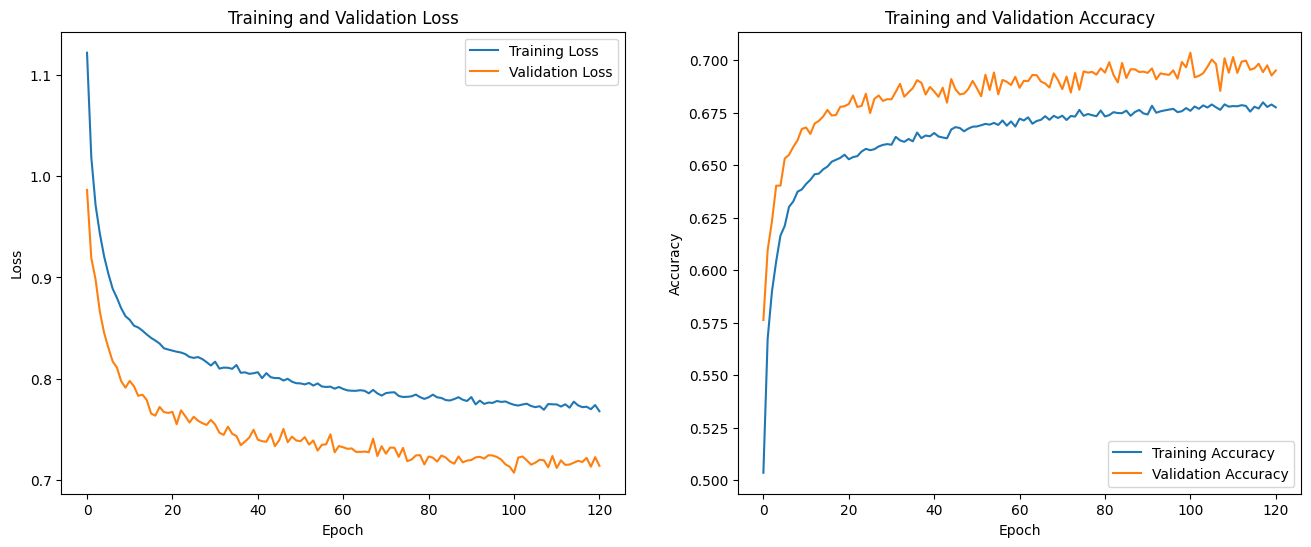

In [ ]:
# 評估模型
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Loss的視覺化
plt.figure(figsize=(16, 6))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy的視覺化
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model

# 載入儲存的最佳模型
best_model = load_model('best_model.h5')

# 使用載入的模型對測試集進行預測
y_test_pred = best_model.predict(X_test2)

# 將預測結果轉換為類別標籤（例如，將機率最高的類別標籤化為預測結果）
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# 加上 1 後將預測結果寫入 CSV 檔案
result_df = pd.DataFrame({'ID': rawdata_test['ID'], 'Severity': y_test_pred_labels + 1})
result_df.to_csv('predictions2.csv', index=False)

664/664 [==============================] - 2s 3ms/step
